##Disciplina - Introdução a Ciência de Dados - Univesp
##Exercícios de Apoio da Semana 4

###1 – Importe as bibliotecas PANDAS, NUMPY, SEABORN, MATPLOTLIB e SWEETVIZ

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
pip install sweetviz

In [ ]:
import sweetviz

###2 – Importe os dados de um arquivo CSV com informações de filmes da Marvel, que está disponível em: https://www.kaggle.com/rachit239/mcu-complete-dataset

In [ ]:
dados=pd.read_csv("/content/mcu dataset.csv")

In [ ]:
dados.head(5)

,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase
0,Iron Man,"May 2, 2008",Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1
1,The incredible Hulk,"June 13, 2008",Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1
2,Iron Man 2,"May 7, 2010",Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1
3,Thor,"May 6, 2011",Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1
4,Captain America: The first Avenger,"July 22, 2011",Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1


###3 – Usando a biblioteca Sweetviz, verifique qual foi o valor de orçamento (budget) que aconteceu mais vezes nos filmes da Marvel, e indique qual a porcentagem de vezes que esse valor foi determinado para os filmes.

In [ ]:
infos=sweetviz.analyze(dados)
infos.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


O orçamento que aconteceu mais vezes foi de $200 milhões e a porcentagem de vezes é de 17%.

###4 – Usando uma correlação de Pearson, verifique no database da Marvel, quais são as variáveis que tem maior correlação positiva.

In [ ]:
mask = np.triu(np.ones_like(dados.corr(), dtype=np.bool))

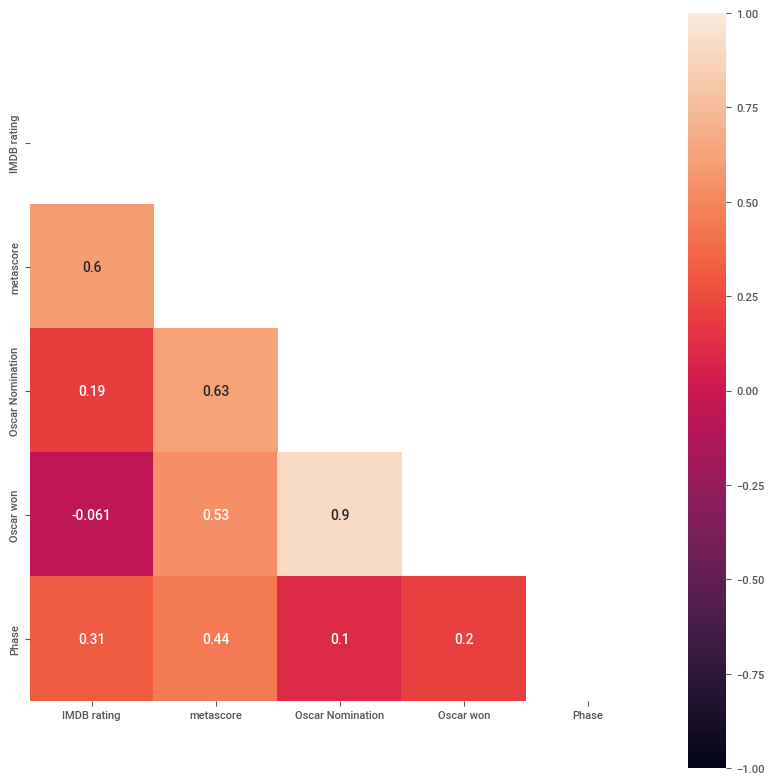

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dados.corr(), mask=mask, square = True, annot=True, vmin=-1, vmax=1)
plt.show()

###5 – Entre no Portal Brasileiro de Dados Abertos e baixe o arquivo CSV da Relação de Empreendimentos de Geração (https://dados.gov.br/dataset/relacao-de-empreendimentos-de-geracao). Informe qual é a licença atribuída a esse dado.

A licença atribuída a esse dado é a <a href="https://opendefinition.org/od/2.1/en/">Open Data.</a>

###6 – Importe somente as primeiras 500 linhas desse arquivo CSV que foi baixado. Observe que como esse arquivo é de origem brasileira, precisaremos utilizar o parâmetro encoding='iso-8859-1' na função read_csv do pandas.

In [13]:
dados_reg=pd.read_csv('/content/EmpreendimentoOperacao.csv',sep=',',nrows=500, encoding='iso-8859-1')

In [ ]:
dados_reg.head(10)

,codCEG,codNucleoCEG,nomEmpreendimento,datOperacao,sigTipoGeracao,mdaPotenciaOutorgadakW,mdaPotenciaFiscalizadakW,sigDestinoEnergia,dscOrigemCombustivel,nomFonteNivel1,nomFonteNivel2,dscParticipacaoProprietario,dscMunicipio,mesReferencia,anoReferencia,dthProcessamento
0,UHE.PH.RS.000012-4.01,12,14 de Julho,25/12/2008 00:00:00,UHE,100000.0,47.5,PIE,Hídrica,Potencial hidráulico,Potencial hidráulico,100.00% para COMPANHIA ENERGÉTICA RIO DAS ANTAS,Bento Gonçalves - RS - CodIbge: 4302105 / Cot...,12,2021,05/12/2021 00:00:00
1,UTE.PE.SC.029920-0.01,29920,29 de Outubro,07/10/2008 00:00:00,UTE,62.0,0.0,REG,Fóssil,Petróleo,Óleo Diesel,100.00% para Condomínio Residencial 29 de Out...,Jaraguá do Sul - SC - CodIbge: 4208906,12,2021,05/12/2021 00:00:00
2,UTE.PE.MG.032686-0.01,32686,300KVA SCANIA,01/06/2013 00:00:00,UTE,240.0,0.0,REG,Fóssil,Petróleo,Óleo Diesel,100.00% para Mineração Curimbaba Ltda.,Poços de Caldas - MG - CodIbge: 3151800,12,2021,05/12/2021 00:00:00
3,UTE.PE.SP.028642-7.01,28642,3M Itapetininga,12/06/2002 00:00:00,UTE,3840.0,0.0,REG,Fóssil,Petróleo,Óleo Diesel,100.00% para 3M do Brasil Ltda,Itapetininga - SP - CodIbge: 3522307,12,2021,05/12/2021 00:00:00
4,UTE.PE.SP.028919-1.01,28919,3M Sumaré,01/10/2001 00:00:00,UTE,6400.0,0.0,APE,Fóssil,Petróleo,Óleo Diesel,100.00% para 3M do Brasil Ltda,Sumaré - SP - CodIbge: 3552403,12,2021,05/12/2021 00:00:00
5,UTE.PE.AC.032707-7.01,32707,A.C.D.A. IMPORTAÇÃO E EXPORTAÇÃO - AMAPÁ,15/01/2013 00:00:00,UTE,288.0,0.0,REG,Fóssil,Petróleo,Óleo Diesel,100.00% para A.C.D.A. Importação e exportação...,Rio Branco - AC - CodIbge: 1200401,12,2021,05/12/2021 00:00:00
6,UTE.PE.AC.032725-5.01,32725,A.C.D.A. IMPORTAÇÃO E EXPORTAÇÃO - AVIÁRIO,05/02/2011 00:00:00,UTE,272.0,0.0,REG,Fóssil,Petróleo,Óleo Diesel,100.00% para A.C.D.A. Importação e exportação...,Rio Branco - AC - CodIbge: 1200401,12,2021,05/12/2021 00:00:00
7,UTE.PE.AC.032728-0.01,32728,A.C.D.A. IMPORTAÇÃO E EXPORTAÇÃO - BOSQUE,10/12/2010 00:00:00,UTE,272.0,0.0,REG,Fóssil,Petróleo,Óleo Diesel,100.00% para A.C.D.A. Importação e exportação...,Rio Branco - AC - CodIbge: 1200401,12,2021,05/12/2021 00:00:00
8,UTE.PE.AC.032704-2.01,32704,A.C.D.A. IMPORTAÇÃO E EXPORTAÇÃO - CHICO MENDES,15/01/2011 00:00:00,UTE,272.0,0.0,REG,Fóssil,Petróleo,Óleo Diesel,100.00% para A.C.D.A. Importação e exportação...,Rio Branco - AC - CodIbge: 1200401,12,2021,05/12/2021 00:00:00
9,UTE.PE.AC.032701-8.01,32701,A.C.D.A. IMPORTAÇÃO E EXPORTAÇÃO - MIX,05/01/2013 00:00:00,UTE,800.0,0.0,REG,Fóssil,Petróleo,Óleo Diesel,100.00% para A.C.D.A. Importação e exportação...,Rio Branco - AC - CodIbge: 1200401,12,2021,05/12/2021 00:00:00


###7 – Com os dados de Empreendimentos de Geração, indique qual é o atributo que mais tem valores nulos e elimine-o.

In [14]:
dados_reg.isnull().sum()

codCEG                           0
codNucleoCEG                     0
nomEmpreendimento                0
datOperacao                     10
sigTipoGeracao                   0
mdaPotenciaOutorgadakW           0
mdaPotenciaFiscalizadakW       250
sigDestinoEnergia                0
dscOrigemCombustivel             0
nomFonteNivel1                   0
nomFonteNivel2                   0
dscParticipacaoProprietario      3
dscMunicipio                     2
mesReferencia                    0
anoReferencia                    0
dthProcessamento                 0
dtype: int64

In [15]:
dados_reg = dados_reg.drop('mdaPotenciaFiscalizadakW','columns')
dados_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codCEG                       500 non-null    object 
 1   codNucleoCEG                 500 non-null    int64  
 2   nomEmpreendimento            500 non-null    object 
 3   datOperacao                  490 non-null    object 
 4   sigTipoGeracao               500 non-null    object 
 5   mdaPotenciaOutorgadakW       500 non-null    float64
 6   sigDestinoEnergia            500 non-null    object 
 7   dscOrigemCombustivel         500 non-null    object 
 8   nomFonteNivel1               500 non-null    object 
 9   nomFonteNivel2               500 non-null    object 
 10  dscParticipacaoProprietario  497 non-null    object 
 11  dscMunicipio                 498 non-null    object 
 12  mesReferencia                500 non-null    int64  
 13  anoReferencia       

###8 – Com os dados de Empreendimentos de Geração, indique qual é o atributo que tem valores nulos na menor quantidade e elimine as linhas que tem esses atributos com valor nulo.

O atributo com valores nulos na menor quantidade é dscMunicipio.

In [16]:
dados_reg.dropna(subset=['dscMunicipio'], inplace=True)

In [20]:
dados_reg.isnull().sum()

codCEG                          0
codNucleoCEG                    0
nomEmpreendimento               0
datOperacao                    10
sigTipoGeracao                  0
mdaPotenciaOutorgadakW          0
sigDestinoEnergia               0
dscOrigemCombustivel            0
nomFonteNivel1                  0
nomFonteNivel2                  0
dscParticipacaoProprietario     3
dscMunicipio                    0
mesReferencia                   0
anoReferencia                   0
dthProcessamento                0
dtype: int64

###9 – Com os dados de Empreendimentos de Geração, crie uma nova coluna chamada “mdaPotenciaOutorgadaMW”, baseada na coluna “mdaPotenciaOutorgadakW”. Observe que a nova coluna é em Megawatt e a anterior Kilowatt.

In [24]:
dados_reg['mdaPotenciaOutorgadaMW']=dados_reg['mdaPotenciaOutorgadakW']/1000

In [27]:
dados_reg.head(3)

,codCEG,codNucleoCEG,nomEmpreendimento,datOperacao,sigTipoGeracao,mdaPotenciaOutorgadakW,sigDestinoEnergia,dscOrigemCombustivel,nomFonteNivel1,nomFonteNivel2,dscParticipacaoProprietario,dscMunicipio,mesReferencia,anoReferencia,dthProcessamento,mdaPotenciaOutorgadaMW
0,UHE.PH.RS.000012-4.01,12,14 de Julho,25/12/2008 00:00:00,UHE,100000.0,PIE,Hídrica,Potencial hidráulico,Potencial hidráulico,100.00% para COMPANHIA ENERGÉTICA RIO DAS ANTAS,Bento Gonçalves - RS - CodIbge: 4302105 / Cot...,12,2021,05/12/2021 00:00:00,100.000
1,UTE.PE.SC.029920-0.01,29920,29 de Outubro,07/10/2008 00:00:00,UTE,62.0,REG,Fóssil,Petróleo,Óleo Diesel,100.00% para Condomínio Residencial 29 de Out...,Jaraguá do Sul - SC - CodIbge: 4208906,12,2021,05/12/2021 00:00:00,0.062
2,UTE.PE.MG.032686-0.01,32686,300KVA SCANIA,01/06/2013 00:00:00,UTE,240.0,REG,Fóssil,Petróleo,Óleo Diesel,100.00% para Mineração Curimbaba Ltda.,Poços de Caldas - MG - CodIbge: 3151800,12,2021,05/12/2021 00:00:00,0.240


###10 – Com os dados de Empreendimentos de Geração, na coluna datOperação, deixe apenas a data nos valores, eliminando a informação sobre horas.

In [32]:
dados_reg['datOperação']=dados_reg['datOperacao'].str.replace('00:00:00','')

In [35]:
dados_reg['datOperação']

0      25/12/2008 
1      07/10/2008 
2      01/06/2013 
3      12/06/2002 
4      01/10/2001 
          ...     
495    10/03/2018 
496    01/02/2017 
497    29/11/2013 
498    13/03/2018 
499    25/01/2018 
Name: datOperação, Length: 498, dtype: object

###11 - Com os dados de Empreendimentos de Geração, crie uma nova coluna a partir da coluna “sigTipoGeracao”, em que os valores categóricos (qualitativos) serão substituídos por valores numéricos. 

In [36]:
from sklearn.preprocessing import LabelEncoder

In [41]:
geracao = dados_reg['sigTipoGeracao']

In [42]:
geracao

0      UHE
1      UTE
2      UTE
3      UTE
4      UTE
      ... 
495    UFV
496    UTE
497    UTE
498    UFV
499    UFV
Name: sigTipoGeracao, Length: 498, dtype: object

In [45]:
lencoder = LabelEncoder()
geracaonum = lencoder.fit_transform(geracao)
geracaonum

array([4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 5, 0, 3, 3, 3, 5, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 5, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 5, 3, 5,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       5, 5, 5, 2, 5, 0, 5, 0, 0, 0, 5, 5, 5, 2, 1, 5, 2, 5, 2, 4, 3, 3,
       3, 0, 0, 0, 5, 5, 3, 3, 3, 0, 5, 3, 3, 3, 3, 3, 3, 3, 4, 0, 5, 5,
       5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 5, 3, 3, 3, 3, 3, 5, 3,
       3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5,

In [46]:
dados_reg['sigTipoGeracaoNum'] = geracaonum

In [47]:
dados_reg['sigTipoGeracaoNum']

0      4
1      5
2      5
3      5
4      5
      ..
495    3
496    5
497    5
498    3
499    3
Name: sigTipoGeracaoNum, Length: 498, dtype: int64